## 1. 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
import scipy

## 2. 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

## 3. EDA

In [3]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### datetime 날짜 변환

In [7]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

<Axes: xlabel='year', ylabel='count'>

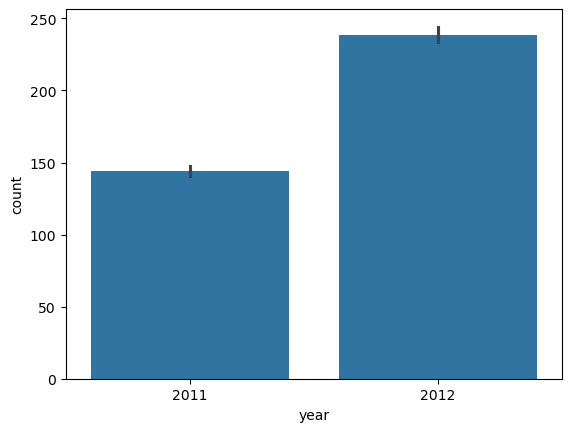

In [10]:
sns.barplot(data = train, x = 'year', y = 'count')

<Axes: xlabel='month', ylabel='count'>

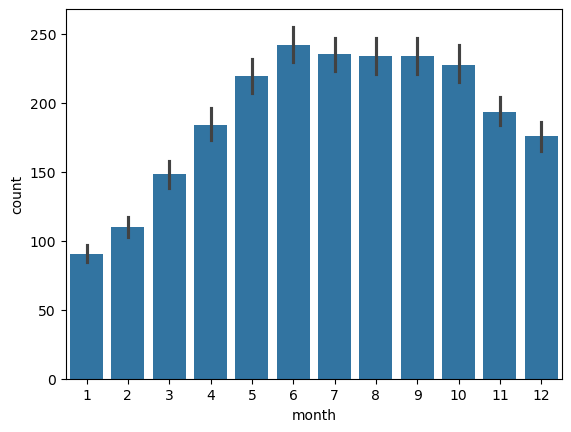

In [11]:
sns.barplot(data = train, x = 'month', y = 'count')

<Axes: xlabel='day', ylabel='count'>

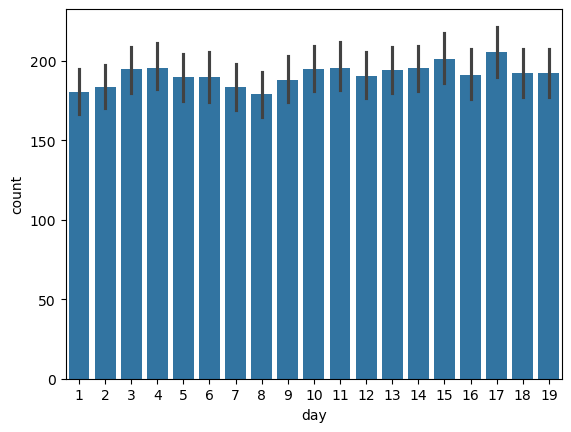

In [12]:
sns.barplot(data = train, x = 'day', y = 'count')

<Axes: xlabel='season', ylabel='count'>

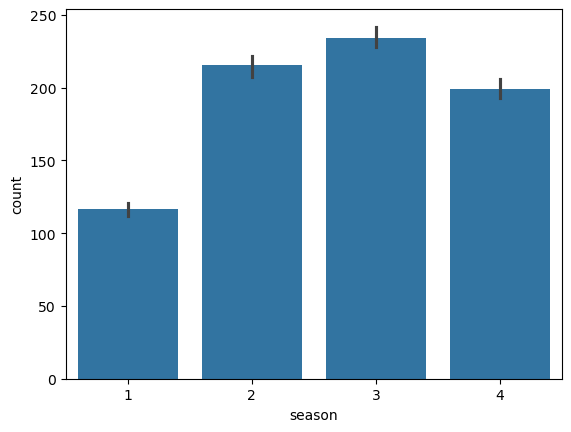

In [13]:
sns.barplot(data = train, x = 'season', y = 'count')

<Axes: xlabel='hour', ylabel='count'>

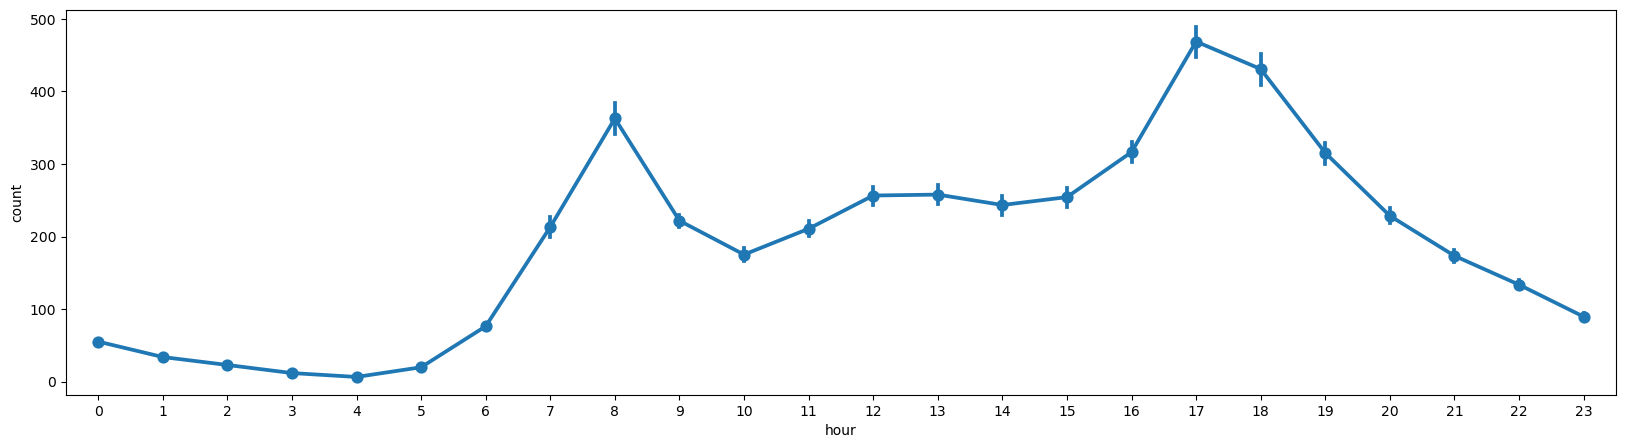

In [14]:
fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(20, 5)
sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)

<Axes: xlabel='hour', ylabel='count'>

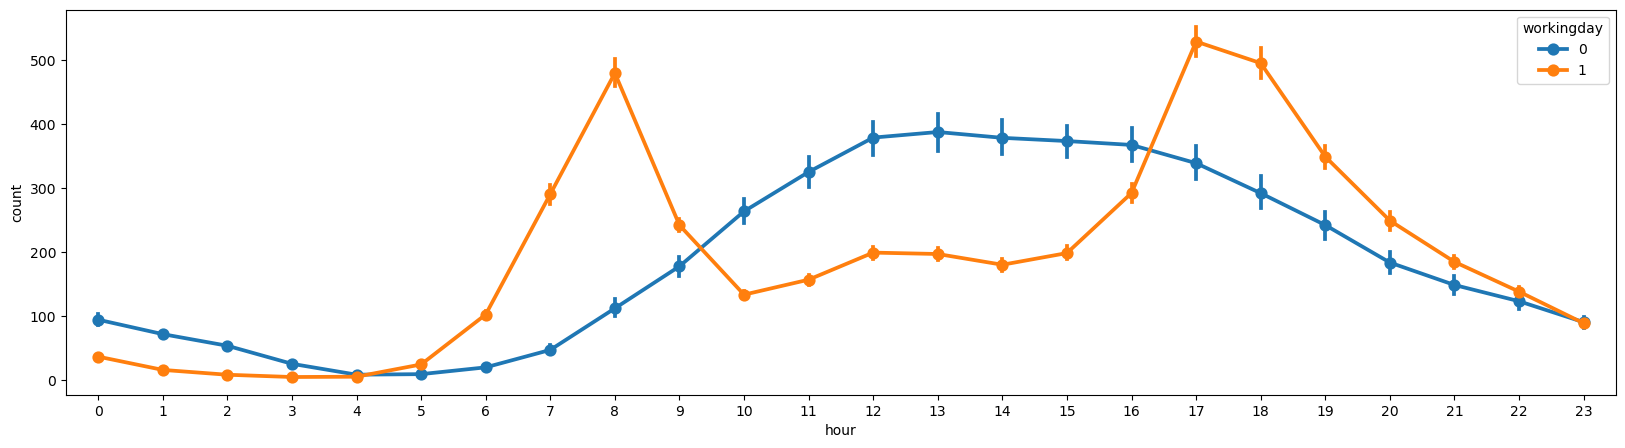

In [15]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax1)

<Axes: xlabel='hour', ylabel='count'>

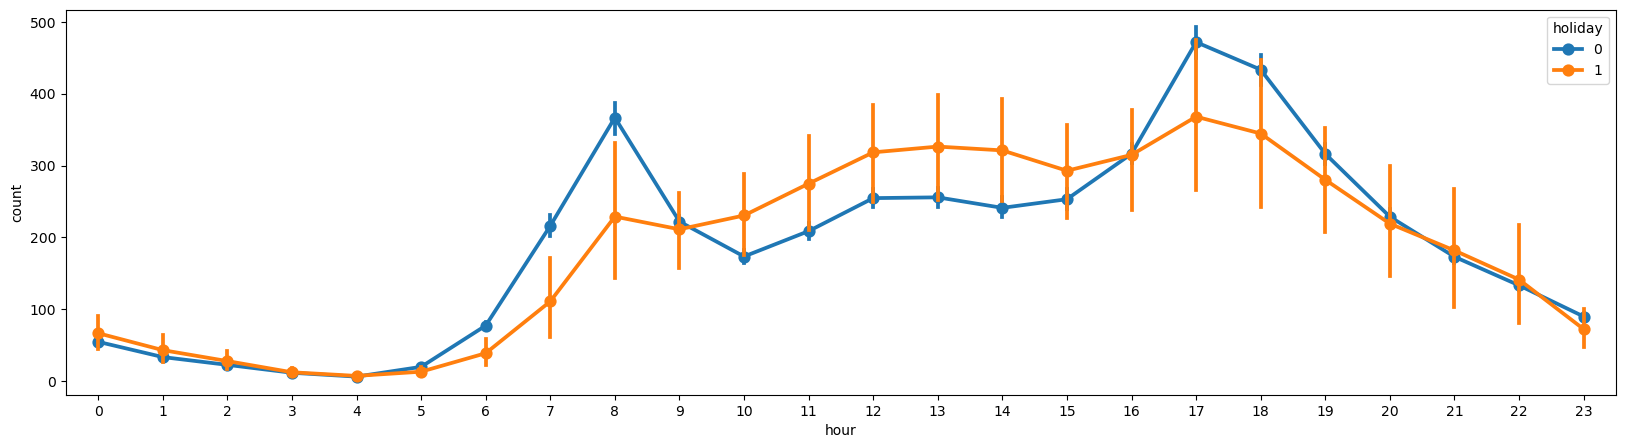

In [16]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 5)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax = ax1)

<Axes: xlabel='hour', ylabel='count'>

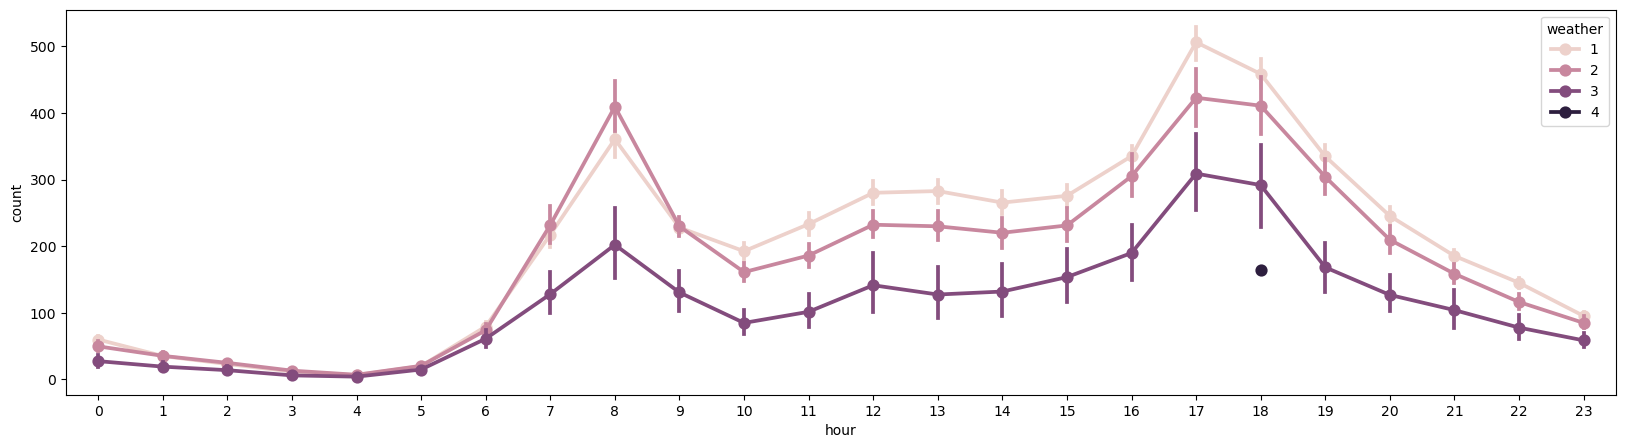

In [17]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax1)

<Axes: xlabel='hour', ylabel='count'>

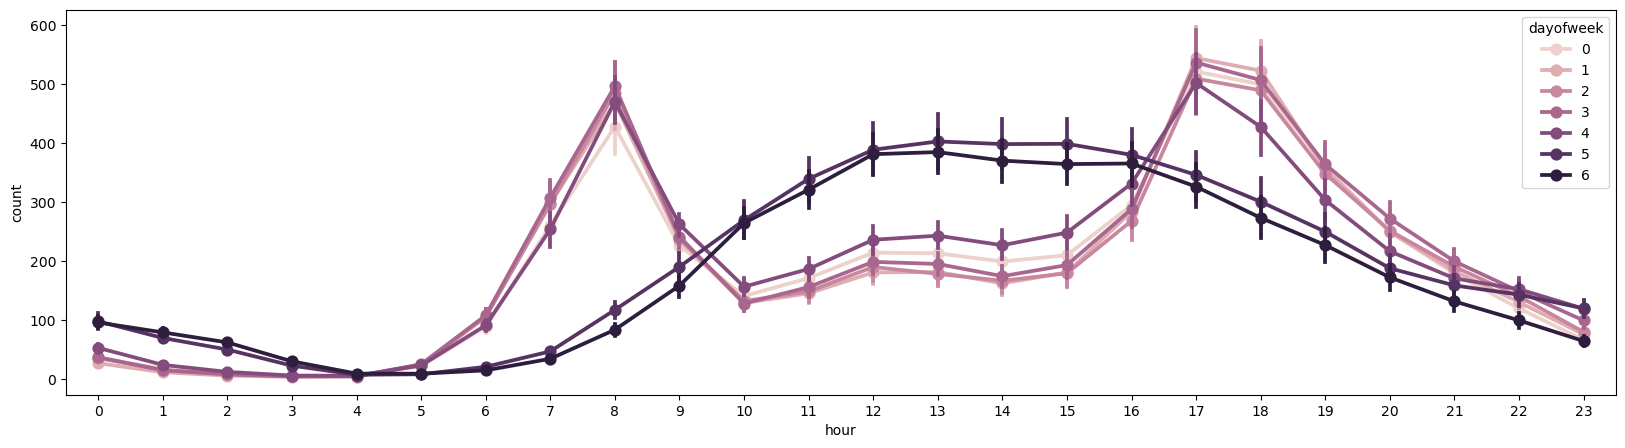

In [18]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax1)

<Axes: xlabel='humidity', ylabel='count'>

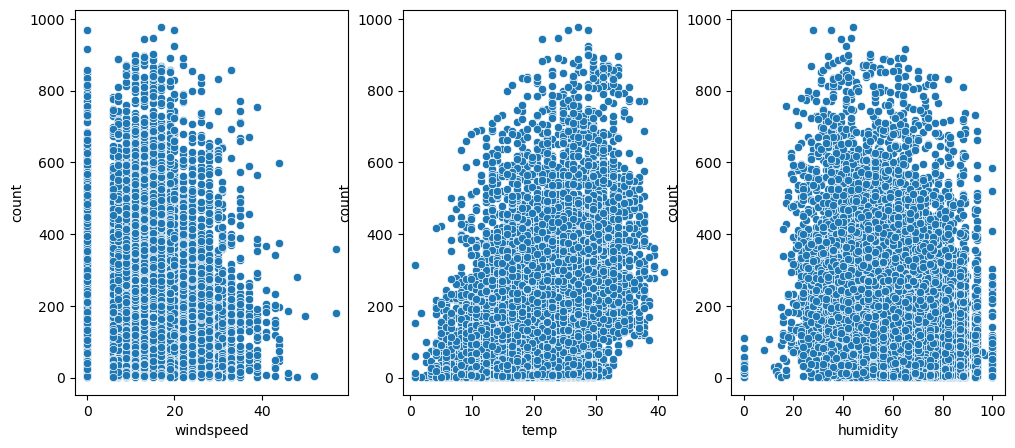

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))

sns.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax1)
sns.scatterplot(data = train, x = 'temp', y = 'count', ax = ax2)
sns.scatterplot(data = train, x = 'humidity', y =  'count', ax = ax3)

In [20]:
len(train[train['windspeed']==0])

1313

## Feature Engineering

<Axes: xlabel='count'>

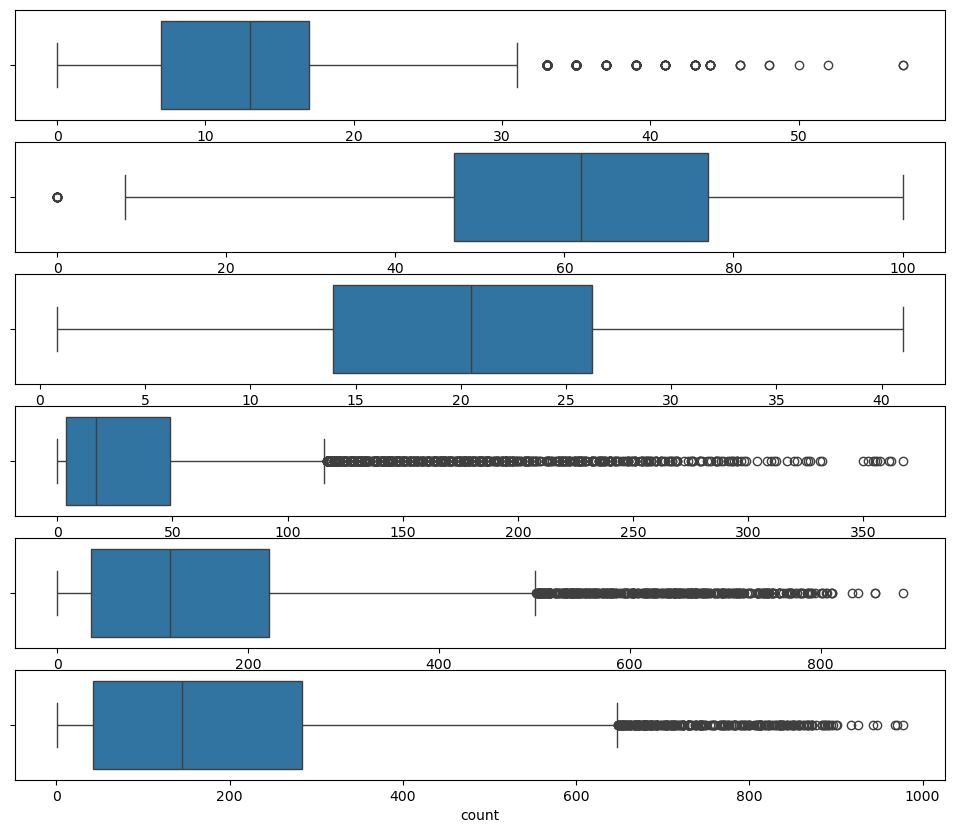

In [21]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (12,10))
sns.boxplot(data = train, x = 'windspeed', ax = ax1)
sns.boxplot(data = train, x = 'humidity', ax = ax2)
sns.boxplot(data = train, x = 'temp', ax = ax3)
sns.boxplot(data = train, x = 'casual', ax = ax4)
sns.boxplot(data = train, x = 'registered', ax = ax5)
sns.boxplot(data = train, x = 'count', ax = ax6)

## 이상치 처리

In [22]:
Q1 = train['count'].quantile(0.25)
Q3 = train['count'].quantile(0.75)
IQR = Q3 - Q1
train = train[(train['count'] >= Q1 - 1.5 * IQR) & (train['count'] <= Q3 + 1.5 * IQR)]

In [23]:
from sklearn.preprocessing import StandardScaler

# 4. One-Hot Encoding
train = pd.get_dummies(train, columns=['season', 'weather'], drop_first=False)
test = pd.get_dummies(test, columns=['season', 'weather'], drop_first=False)

# 5. 연속형 변수 스케일링
scaler = StandardScaler()
train[['temp', 'atemp', 'humidity', 'windspeed']] = scaler.fit_transform(
    train[['temp', 'atemp', 'humidity', 'windspeed']]
)
test[['temp', 'atemp', 'humidity', 'windspeed']] = scaler.fit_transform(
    test[['temp', 'atemp', 'humidity', 'windspeed']]
)

## 모델 학습

In [ ]:
from sklearn

x = train.drop(['count'], axis=1)
y = train['count']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=2024)

In [ ]:
from sklearn.model_selection import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=2024)
model.fit(x_train)

## 모델 평가

## 예측 및 평가